## Logistic Regression in Python and Numpy

In logistic regression, we are trying to model the outcome of a **binary variable** given a **linear combination of input features**. For example, we could try to predict the outcome of an election (win/lose) using information about how much money a candidate spent campaigning, how much time she/he spent campaigning, etc.

### Model 

Logistic regression works as follows.

**Given:** 
- dataset $\{(\boldsymbol{x}^{(1)}, y^{(1)}), ..., (\boldsymbol{x}^{(m)}, y^{(m)})\}$
- with $\boldsymbol{x}^{(i)}$ being a $d-$dimensional vector $\boldsymbol{x}^{(i)} = (x^{(i)}_1, ..., x^{(i)}_d)$
- $y^{(i)}$ being a binary target variable, $y^{(i)} \in \{0,1\}$

The logistic regression model can be interpreted as a very **simple neural network:**
- it has a real-valued weight vector $\boldsymbol{w}= (w^{(1)}, ..., w^{(d)})$
- it has a real-valued bias $b$
- it uses a sigmoid function as its activation function

![title](figures/logistic_regression.jpg)

### Training

Different to [linear regression](linear_regression.ipynb), logistic regression has no closed form solution. But the cost function is convex, so we can train the model using gradient descent. In fact, **gradient descent** (or any other optimization algorithm) is guaranteed to find the global minimum (if the learning rate is small enough and enough training iterations are used).  

Training a logistic regression model has different steps. In the beginning (step 0) the parameters are initialized. The other steps are repeated for a specified number of training iterations or until convergence of the parameters.

* * * 
**Step 0: ** Initialize the weight vector and bias with zeros (or small random values).
* * *

**Step 1: ** Compute a linear combination of the input features and weights. This can be done in one step for all training examples, using vectorization and broadcasting:
$\boldsymbol{a} = \boldsymbol{X} \cdot \boldsymbol{w} + b $

where $\boldsymbol{X}$ is a matrix of shape $(n_{samples}, n_{features})$ that holds all training examples, and $\cdot$ denotes the dot product.
* * *

**Step 2: ** Apply the sigmoid activation function, which returns values between 0 and 1:

$\boldsymbol{\hat{y}} = \sigma(\boldsymbol{a}) = \frac{1}{1 + \exp(-\boldsymbol{a})}$
* * *

** Step 3: ** Compute the cost over the whole training set. We want to model the probability of the target values being 0 or 1. So during training we want to adapt our parameters such that our model outputs high values for examples with a positive label (true label being 1) and small values for examples with a negative label (true label being 0). This is reflected in the cost function:

$J(\boldsymbol{w},b) = - \frac{1}{m} \sum_{i=1}^m \Big[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \Big]$
* * *

** Step 4: ** Compute the gradient of the cost function with respect to the weight vector and bias. A detailed explanation of this derivation can be found [here](https://stats.stackexchange.com/questions/278771/how-is-the-cost-function-from-logistic-regression-derivated).

The general formula is given by:

$ \frac{\partial J}{\partial w_j} = \frac{1}{m}\sum_{i=1}^m\left[\hat{y}^{(i)}-y^{(i)}\right]\,x_j^{(i)}$

For the bias, the inputs $x_j^{(i)}$ will be given 1.
* * *

** Step 5: ** Update the weights and bias

$\boldsymbol{w} = \boldsymbol{w} - \eta \, \nabla_w J$  

$b = b - \eta \, \nabla_b J$

where $\eta$ is the learning rate.

In [18]:
import numpy as np
class LogisticRegression:
    
    def fit(self, X, y, lr = 0.001, epochs=10000, verbose=True, batch_size=1):
        self.classes = np.unique(y)
        y = (y==self.classes[1]) * 1
        X = self.add_bias(X)
        self.weights = np.zeros(X.shape[1])
        self.loss = []
        for i in range(epochs):
            self.loss.append(self.cross_entropy(X,y))
            if i % 1000 == 0 and verbose: 
                print('Iterations: %d - Error : %.4f' %(i, self.loss[i]))
            idx = np.random.choice(X.shape[0], batch_size)
            X_batch, y_batch =  X[idx], y[idx]
            self.weights -= lr * self.get_gradient(X_batch, y_batch)
        return self
    
    def get_gradient(self, X, y):
        return -1.0 * (y - self.predict_(X)).dot(X) / len(X)
    
    def predict_(self, X):
        return self.sigmoid(np.dot(X, self.weights))
    
    def predict(self, X):
        return self.predict_(self.add_bias(X))
    
    def sigmoid(self, z):
        return 1.0/(1 + np.exp(-z))
    
    def predict_classes(self, X):
        return self.predict_classes_(self.add_bias(X))

    def predict_classes_(self, X):
        return np.vectorize(lambda c: self.classes[1] if c>=0.5 else self.classes[0])(self.predict_(X))
    
    def cross_entropy(self, X, y):
        p = self.predict_(X)
        return (-1 / len(y)) * (y * np.log(p)).sum()

    def add_bias(self,X):
        return np.insert(X, 0, 1, axis=1)

    def score(self, X, y):
        return self.cross_entropy(self.add_bias(X), y)


In [19]:
from sklearn.metrics import accuracy_score
def train_model(X, y, model):
    model.fit(X, y, lr=0.1)
    pre = model.predict_classes(X)
    print('Accuracy :: ', accuracy_score(y, pre))

In [20]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
lr = LogisticRegression()
train_model(X,(y !=0 )*1, lr)

Iterations: 0 - Error : 69.3147
Iterations: 1000 - Error : 0.4746
Iterations: 2000 - Error : 0.3847
Iterations: 3000 - Error : 0.1645
Iterations: 4000 - Error : 0.1280
Iterations: 5000 - Error : 0.1126
Iterations: 6000 - Error : 0.0783
Iterations: 7000 - Error : 0.0674
Iterations: 8000 - Error : 0.0621
Iterations: 9000 - Error : 0.0664
('Accuracy :: ', 1.0)


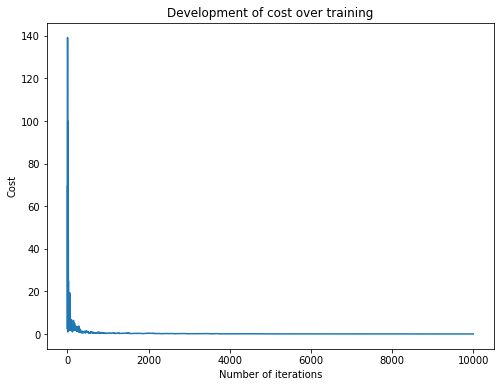

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(len(lr.loss)), lr.loss)
plt.title("Development of cost over training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()